In [14]:
from google.colab import drive #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
drive.mount('/content/gdrive')
from IPython.display import Image
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#https://towardsdatascience.com/named-entity-recognition-ner-using-keras-bidirectional-lstm-28cd3f301f54
#https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
#https://medium.com/@raghavaggarwal0089/bi-lstm-bc3d68da8bd0

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Pré-processamento dos dados

####Tratamento de outliers

In [16]:
df_sc_new = pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")

# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sp_new=df_sp_new[['Data','Temp_sp','NOx_sp','CO_sp','Chuva_sp','Pres_sp','Vel_Vento_sp','SO2_sp','PM10_sp','O3_sp','UR_sp']]

# eliminação das variáveis com menos influentes (encontradas na etapa anterior)
df_sc_new=df_sc_new[['Data','Temp_sc','NOx_sc','CO_sc','Chuva_sc','Pres_sc','Vel_Vento_sc','SO2_sc','PM10_sc','O3_sc','UR_sc']]

In [17]:
# desvio padrão das variáveis do dataframe da Tijuca
df_sp_new.std()

Temp_sp          5.603599
NOx_sp          35.907004
CO_sp            0.252008
Chuva_sp         3.706666
Pres_sp          5.385422
Vel_Vento_sp     1.122239
SO2_sp           5.782657
PM10_sp         18.924257
O3_sp           24.830731
UR_sp           19.398027
dtype: float64

In [18]:
# média das variáveis do dataframe da Tijuca
df_sp_new.mean()

Temp_sp           24.423311
NOx_sp            57.234630
CO_sp              0.401673
Chuva_sp           0.150513
Pres_sp         1015.098704
Vel_Vento_sp       0.736632
SO2_sp             3.773778
PM10_sp           32.948537
O3_sp             28.366178
UR_sp             65.757445
dtype: float64

In [19]:
# desvio padrão das variáveis do dataframe de São Cristóvão
df_sc_new.std()

Temp_sc          4.771902
NOx_sc          35.907004
CO_sc            0.321004
Chuva_sc         0.965220
Pres_sc          4.810906
Vel_Vento_sc     0.582975
SO2_sc           9.602003
PM10_sc         21.806007
O3_sc           26.548084
UR_sc           17.142190
dtype: float64

In [20]:
# média das variáveis do dataframe de São Cristóvão
df_sc_new.mean()

Temp_sc           26.511795
NOx_sc            57.234630
CO_sc              0.241478
Chuva_sc           0.105082
Pres_sc         1014.916328
Vel_Vento_sc       0.891624
SO2_sc             7.672783
PM10_sc           34.386848
O3_sc             24.037099
UR_sc             72.125128
dtype: float64

**Tijuca**

In [21]:
# Temp_sp
def change_Temp_sp(value):
    if value>=24.423311+3*5.603599:
        value=None
    return value

# NOx_sp
def change_NOx_sp(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sp
def change_CO_sp(value):
    if value>=0.401673+3*0.252008:
        value=None
    return value
        
# Chuva_sp
def change_Chuva_sp(value):
    if value>=0.150513+3*3.706666:
        value=None
    return value

# Pres_sp
def change_Pres_sp(value):
    if value>=1015.098704+3*5.385422:
        value=None
    return value
        
# Vel_Vento_sp
def change_Vel_Vento_sp(value):
    if value>=0.736632+3*1.122239:
        value=None
    return value
        
# SO2_sp
def change_SO2_sp(value):
    if value>=3.773778+3*5.782657:
        value=None
    return value

# PM10_sp
def change_PM10_sp(value):
    if value>=32.948537+3*18.924257:
        value=None
    return value
        
# O3_sp
def change_O3_sp(value):
    if value>=28.366178+3*24.830731:
        value=None
    return value
        
# UR_sp
def change_UR_sp(value):
    if value>=65.757445+3*19.398027:
        value=None
    return value

df_sp_new['Temp_sp']=df_sp_new['Temp_sp'].apply(change_Temp_sp)
df_sp_new['NOx_sp']=df_sp_new['NOx_sp'].apply(change_NOx_sp)
df_sp_new['CO_sp']=df_sp_new['CO_sp'].apply(change_CO_sp)
df_sp_new['Chuva_sp']=df_sp_new['Chuva_sp'].apply(change_Chuva_sp)
df_sp_new['Pres_sp']=df_sp_new['Pres_sp'].apply(change_Pres_sp)
df_sp_new['Vel_Vento_sp']=df_sp_new['Vel_Vento_sp'].apply(change_Vel_Vento_sp)
df_sp_new['SO2_sp']=df_sp_new['SO2_sp'].apply(change_SO2_sp)
df_sp_new['PM10_sp']=df_sp_new['PM10_sp'].apply(change_PM10_sp)
df_sp_new['O3_sp']=df_sp_new['O3_sp'].apply(change_O3_sp)
df_sp_new['UR_sp']=df_sp_new['UR_sp'].apply(change_UR_sp)

df_sp_new.interpolate(method='linear', inplace=True)

**São Cristóvão**

In [22]:
# Temp_sc
def change_Temp_sc(value):
    if value>= 26.511795+3*4.771902:
        value=None
    return value

# NOx_sc
def change_NOx_sc(value):
    if value>=57.234630+3*35.907004:
        value=None
    return value
        
# CO_sc
def change_CO_sc(value):
    if value>=0.241478+3*0.321004:
        value=None
    return value
        
# Chuva_sc
def change_Chuva_sc(value):
    if value>=0.105082+3*0.965220:
        value=None
    return value

# Pres_sc
def change_Pres_sc(value):
    if value>=1014.916328+3*4.810906:
        value=None
    return value
        
# Vel_Vento_sc
def change_Vel_Vento_sc(value):
    if value>=0.891624+3*0.582975:
        value=None
    return value
        
# SO2_sc
def change_SO2_sc(value):
    if value>=7.672783+3*9.602003:
        value=None
    return value

# PM10_sc
def change_PM10_sc(value):
    if value>=34.386848+3*21.806007:
        value=None
    return value
        
# O3_sc
def change_O3_sc(value):
    if value>=24.037099+3*26.548084:
        value=None
    return value
        
# UR_sc
def change_UR_sc(value):
    if value>=72.125128+3*17.142190:
        value=None
    return value

df_sc_new['Temp_sc']=df_sc_new['Temp_sc'].apply(change_Temp_sc)
df_sc_new['NOx_sc']=df_sc_new['NOx_sc'].apply(change_NOx_sc)
df_sc_new['CO_sc']=df_sc_new['CO_sc'].apply(change_CO_sc)
df_sc_new['Chuva_sc']=df_sc_new['Chuva_sc'].apply(change_Chuva_sc)
df_sc_new['Pres_sc']=df_sc_new['Pres_sc'].apply(change_Pres_sc)
df_sc_new['Vel_Vento_sc']=df_sc_new['Vel_Vento_sc'].apply(change_Vel_Vento_sc)
df_sc_new['SO2_sc']=df_sc_new['SO2_sc'].apply(change_SO2_sc)
df_sc_new['PM10_sc']=df_sc_new['PM10_sc'].apply(change_PM10_sc)
df_sc_new['O3_sc']=df_sc_new['O3_sc'].apply(change_O3_sc)
df_sc_new['UR_sc']=df_sc_new['UR_sc'].apply(change_UR_sc)

df_sc_new.interpolate(method='linear', inplace=True)

####Agrupamento por dia e padronização

**Tijuca**

In [23]:
df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

Foi escolhida normalização ao invés de padronização, pois as distribuições das variáveis não são normais

In [24]:
names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sp_new_scaled.index=df_sp_new.index

**São Cristóvão**

In [25]:
df_sc_new.reset_index(inplace=True)

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled, columns=names)

df_sc_new_scaled.index=df_sc_new.index

####vetorização dos dados para multiple-input and multiple output

In [26]:
import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

In [27]:
values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

#reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

#Geração do modelo para média (rodada 1/10)

##montagem do modelo

In [28]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [29]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [32]:
print(model.summary()) #rodar depois

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 1, 140)            78960     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             1410      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1, 52)             7696      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             530       
Total params: 88,596
Trainable params: 88,596
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 8s - loss: 0.3436 - val_loss: 0.3347
Epoch 2/5
5/5 - 0s - loss: 0.3136 - val_loss: 0.2980
Epoch 3/5
5/5 - 0s - loss: 0.2762 - val_loss: 0.2535
Epoch 4/5
5/5 - 0s - loss: 0.2318 - val_loss: 0.2039
Epoch 5/5
5/5 - 0s - loss: 0.1843 - val_loss: 0.1556

Model Runtime: 8.63 seconds


##obtenção das métricas do treinamento

In [33]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [34]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,27.10091,24.739449,0.352457,0.807951,1009.943665,0.639273,10.331449,30.954977,32.777691,76.903694


In [35]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 6.073
Test NOx_sc RMSE: 57.158
Test CO_sc RMSE: 0.350
Test Chuva_sc RMSE: 0.936
Test Pres_sc RMSE: 8.495
Test Vel_Vento_sc RMSE: 1.371
Test SO2_sc RMSE: 13.085
Test PM10_sc RMSE: 35.646
Test O3_sc RMSE: 40.971
Test UR_sc RMSE: 16.983


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 4.618
Test NOx_sc MAE: 53.628
Test CO_sc MAE: 0.273
Test Chuva_sc MAE: 0.615
Test Pres_sc MAE: 3.945
Test Vel_Vento_sc MAE: 0.891
Test SO2_sc MAE: 8.588
Test PM10_sc MAE: 25.568
Test O3_sc MAE: 27.456
Test UR_sc MAE: 27.617


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -44.450
Test NOx_sc R2: -145.357
Test CO_sc R2: -128.537
Test Pres_sc R2: -25.806
Test Pres_sc R2: -25.806
Test Vel_Vento_sc R2: -405.965
Test SO2_sc R2: -31.007
Test PM10_sc R2: -228.913
Test O3_sc R2: -124.512
Test UR_sc R2: -1713.629


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 7 Text major ticklabel objects>)

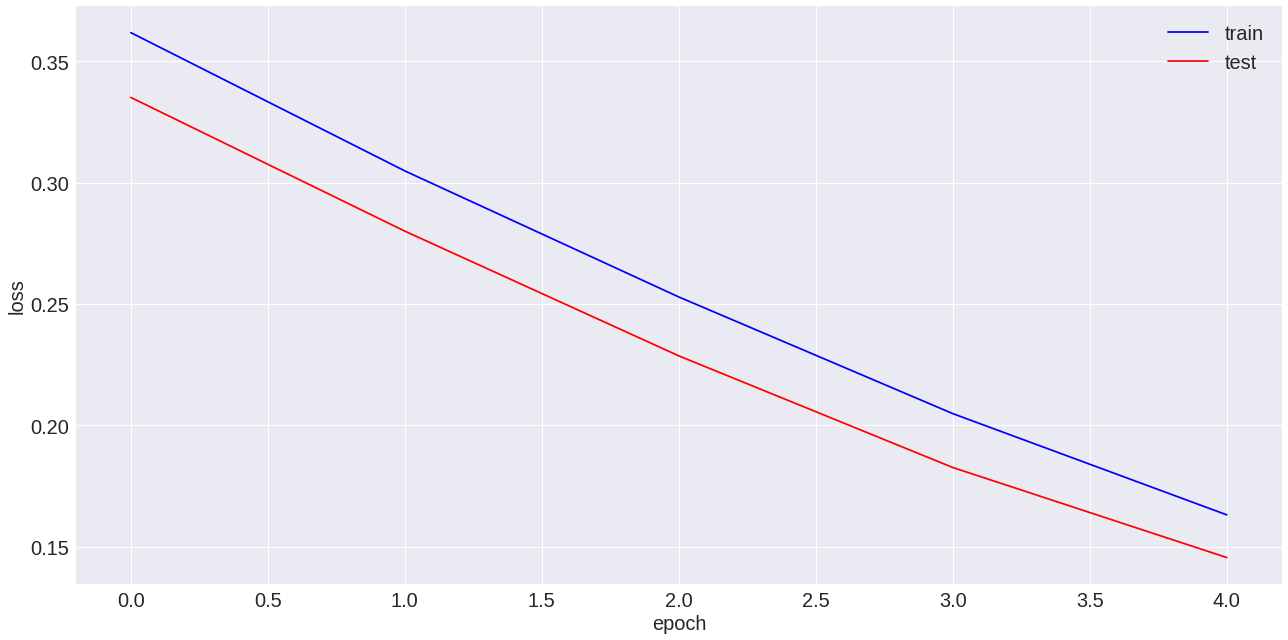

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 2/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 1, 70)             39480     
_________________________________________________________________
time_distributed_14 (TimeDis (None, 1, 10)             710       
_________________________________________________________________
lstm_15 (LSTM)               (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_15 (TimeDis (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 4s - loss: 0.3477 - val_loss: 0.3459
Epoch 2/5
5/5 - 0s - loss: 0.3295 - val_loss: 0.3252
Epoch 3/5
5/5 - 0s - loss: 0.3093 - val_loss: 0.3019
Epoch 4/5
5/5 - 0s - loss: 0.2863 - val_loss: 0.2755
Epoch 5/5
5/5 - 0s - loss: 0.2602 - val_loss: 0.2459

Model Runtime: 4.54 seconds


In [ ]:
test_X

array([[[0.63299606, 0.5568436 , 0.26666667, ..., 0.43229817,
         0.9581298 , 0.60369027]],

       [[0.6882248 , 0.32868448, 0.35      , ..., 0.34087996,
         0.92792344, 0.57152083]],

       [[0.41920735, 0.4192652 , 0.275     , ..., 0.57489429,
         0.94955638, 0.78639231]],

       ...,

       [[0.49225183, 0.75609627, 0.26666667, ..., 0.23993437,
         0.20675905, 0.90953676]],

       [[0.55594304, 0.75727702, 0.24166667, ..., 0.35975183,
         0.4244841 , 0.99710518]],

       [[0.56262394, 0.75845776, 0.4       , ..., 0.98154969,
         0.53205064, 0.89458017]]])

##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,21.030376,19.25539,0.068173,-0.098948,1008.470642,0.963808,-0.950438,14.025976,19.59955,69.165741


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 11.524
Test NOx_sc RMSE: 63.515
Test CO_sc RMSE: 0.560
Test Chuva_sc RMSE: 1.009
Test Pres_sc RMSE: 9.725
Test Vel_Vento_sc RMSE: 1.083
Test SO2_sc RMSE: 22.536
Test PM10_sc RMSE: 50.532
Test O3_sc RMSE: 52.880
Test UR_sc RMSE: 24.761


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 10.529
Test NOx_sc MAE: 49.904
Test CO_sc MAE: 0.453
Test Chuva_sc MAE: 0.551
Test Pres_sc MAE: 8.600
Test Vel_Vento_sc MAE: 0.986
Test SO2_sc MAE: 20.299
Test PM10_sc MAE: 45.643
Test O3_sc MAE: 47.603
Test UR_sc MAE: 23.705


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -2249.975
Test NOx_sc R2: -2943.394
Test CO_sc R2: -6334.093
Test Pres_sc R2: -664.264
Test Pres_sc R2: -664.264
Test Vel_Vento_sc R2: -1239.474
Test SO2_sc R2: -11270.293
Test PM10_sc R2: -6447.255
Test O3_sc R2: -1370.303
Test UR_sc R2: -681.301


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 7 Text major ticklabel objects>)

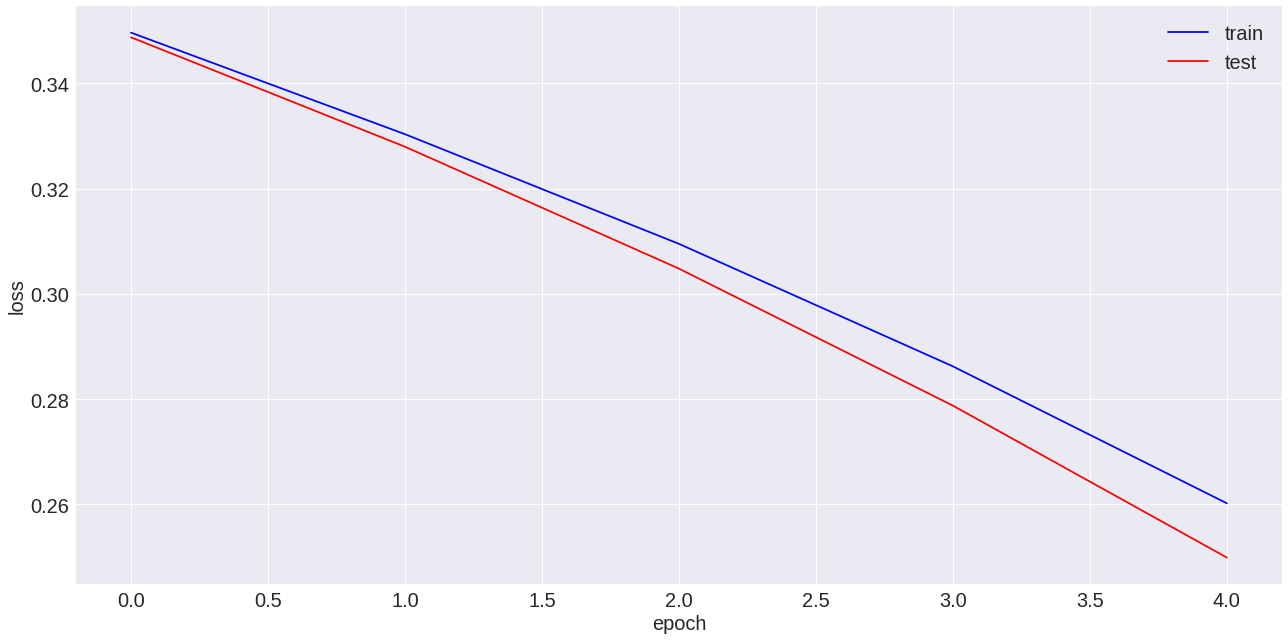

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 3/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

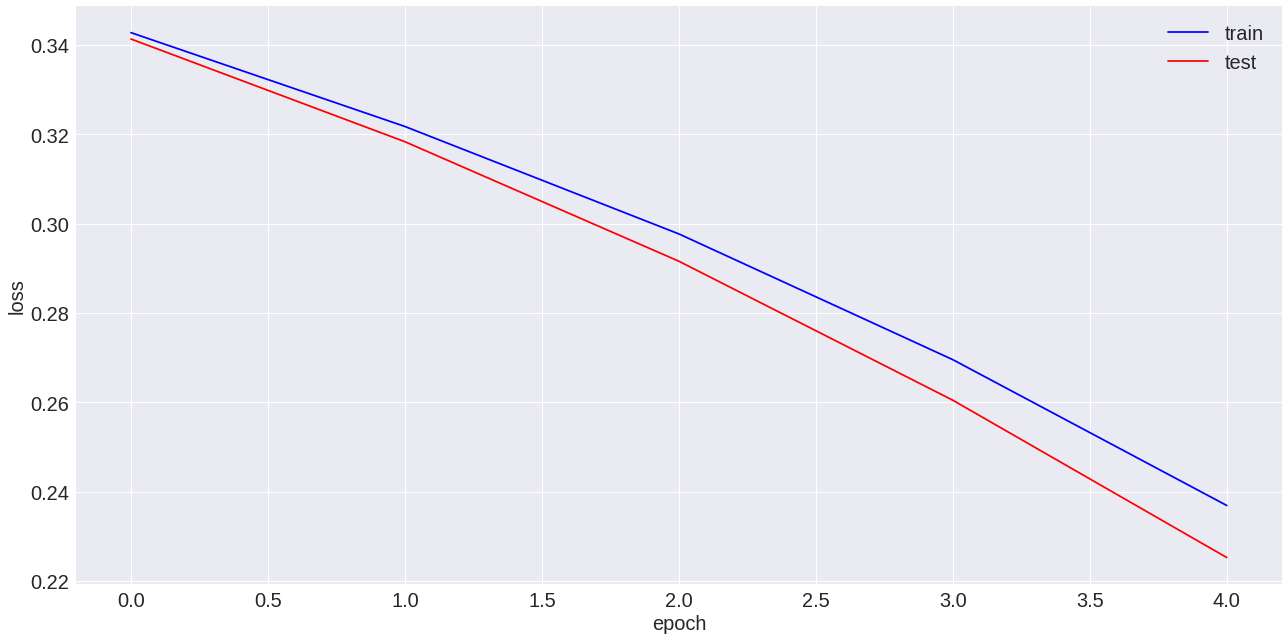

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 4/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

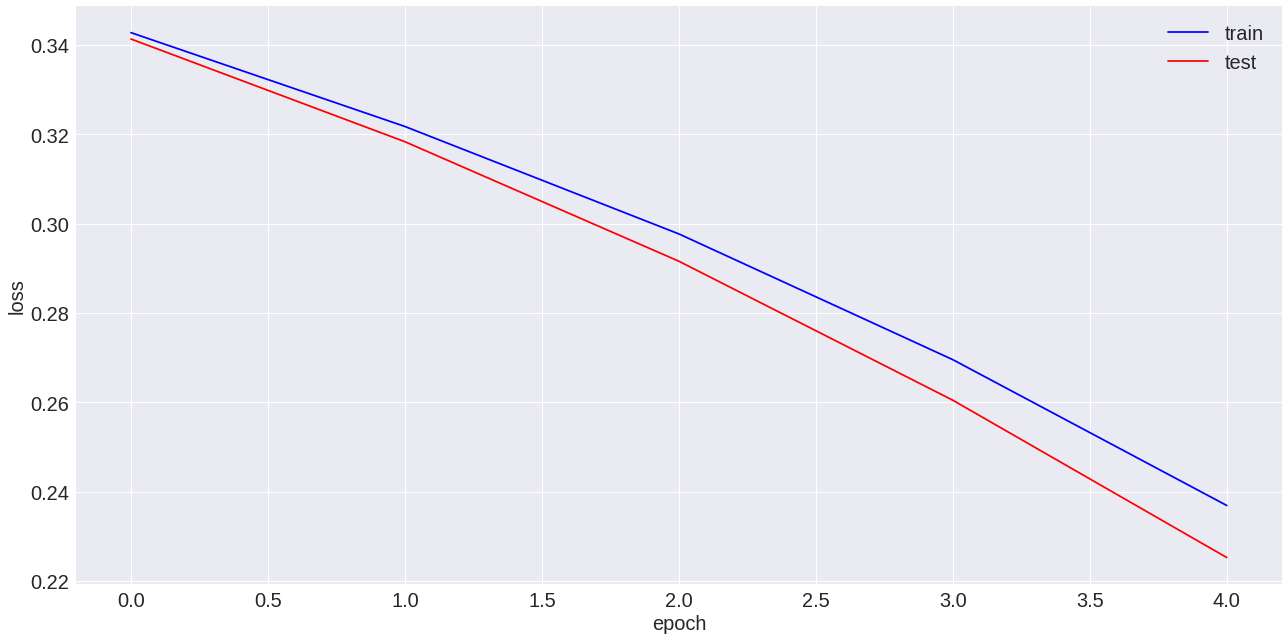

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 5/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

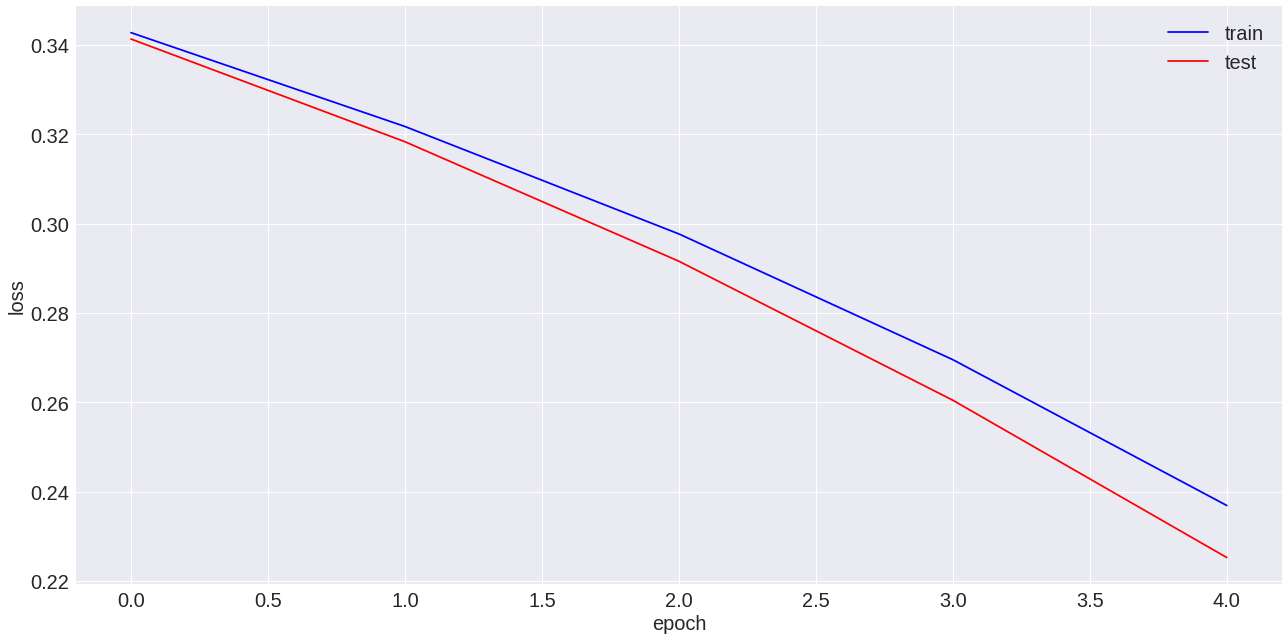

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 6/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

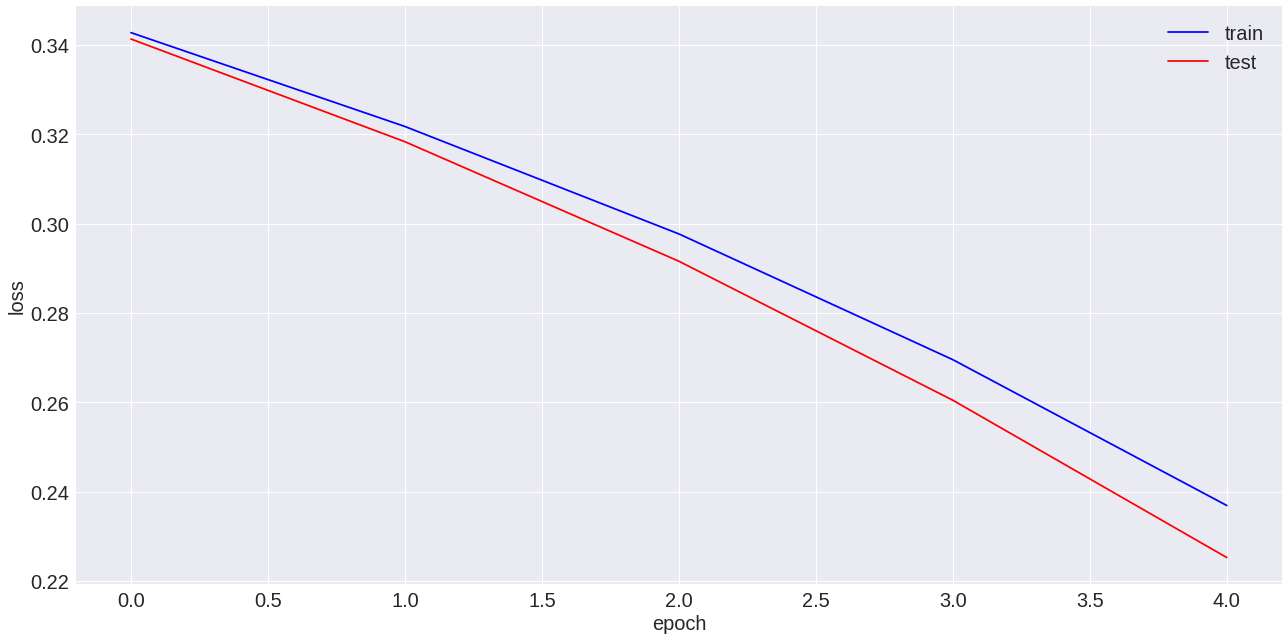

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 7/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

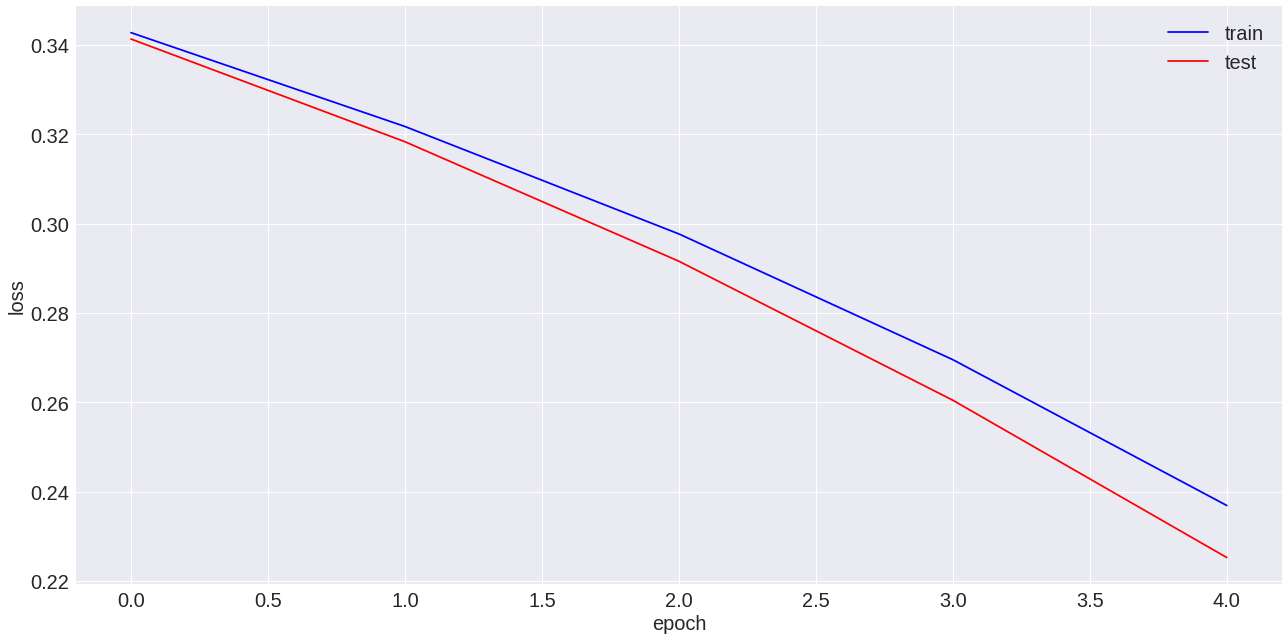

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 8/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

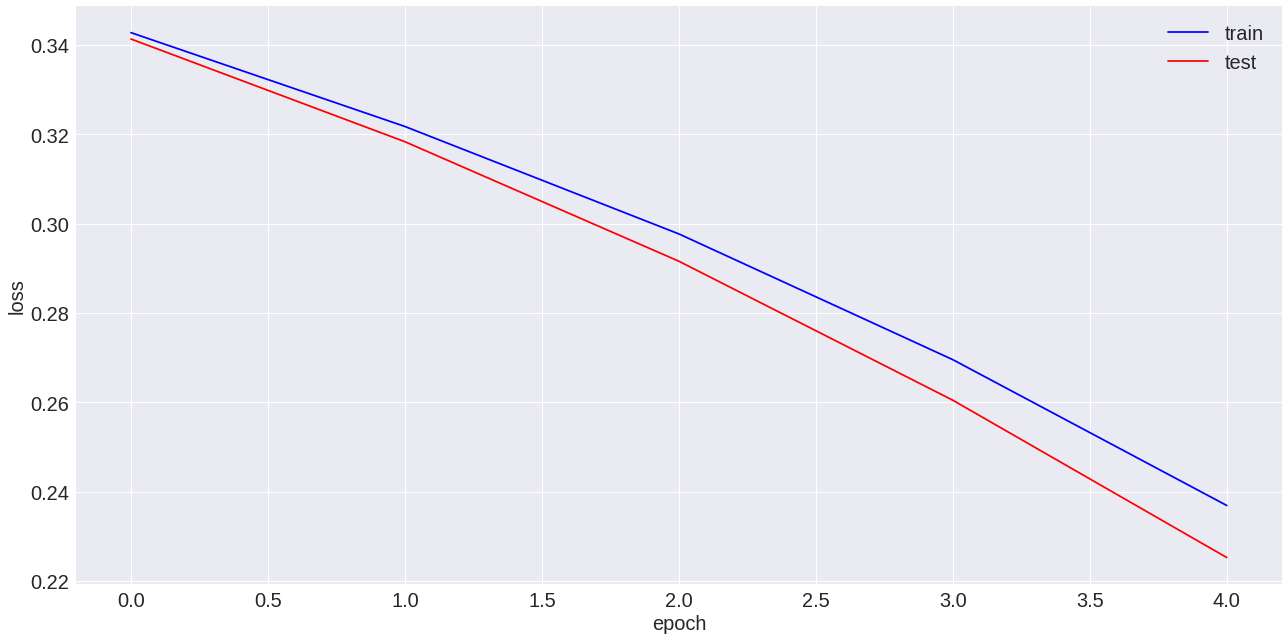

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 9/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 70)             39480     
_________________________________________________________________
time_distributed_16 (TimeDis (None, 1, 10)             710       
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_17 (TimeDis (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3504 - val_loss: 0.3507
Epoch 2/5
5/5 - 0s - loss: 0.3338 - val_loss: 0.3322
Epoch 3/5
5/5 - 0s - loss: 0.3157 - val_loss: 0.3107
Epoch 4/5
5/5 - 0s - loss: 0.2944 - val_loss: 0.2854
Epoch 5/5
5/5 - 0s - loss: 0.2696 - val_loss: 0.2566

Model Runtime: 4.97 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,18.821777,9.0171,0.160808,0.21604,1006.438171,0.800757,2.666699,13.576054,30.646286,66.738297


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 13.465
Test NOx_sc RMSE: 70.692
Test CO_sc RMSE: 0.481
Test Chuva_sc RMSE: 0.875
Test Pres_sc RMSE: 11.617
Test Vel_Vento_sc RMSE: 1.222
Test SO2_sc RMSE: 19.481
Test PM10_sc RMSE: 50.729
Test O3_sc RMSE: 42.646
Test UR_sc RMSE: 27.062


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 12.593
Test NOx_sc MAE: 58.543
Test CO_sc MAE: 0.365
Test Chuva_sc MAE: 0.550
Test Pres_sc MAE: 10.650
Test Vel_Vento_sc MAE: 1.136
Test SO2_sc MAE: 16.882
Test PM10_sc MAE: 45.891
Test O3_sc MAE: 36.798
Test UR_sc MAE: 26.112


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -12777.010
Test NOx_sc R2: -6393.557
Test CO_sc R2: -751.262
Test Pres_sc R2: -2406.385
Test Pres_sc R2: -2406.385
Test Vel_Vento_sc R2: -6430.154
Test SO2_sc R2: -12863.976
Test PM10_sc R2: -4300.063
Test O3_sc R2: -331.022
Test UR_sc R2: -1898.761


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 7 Text major ticklabel objects>)

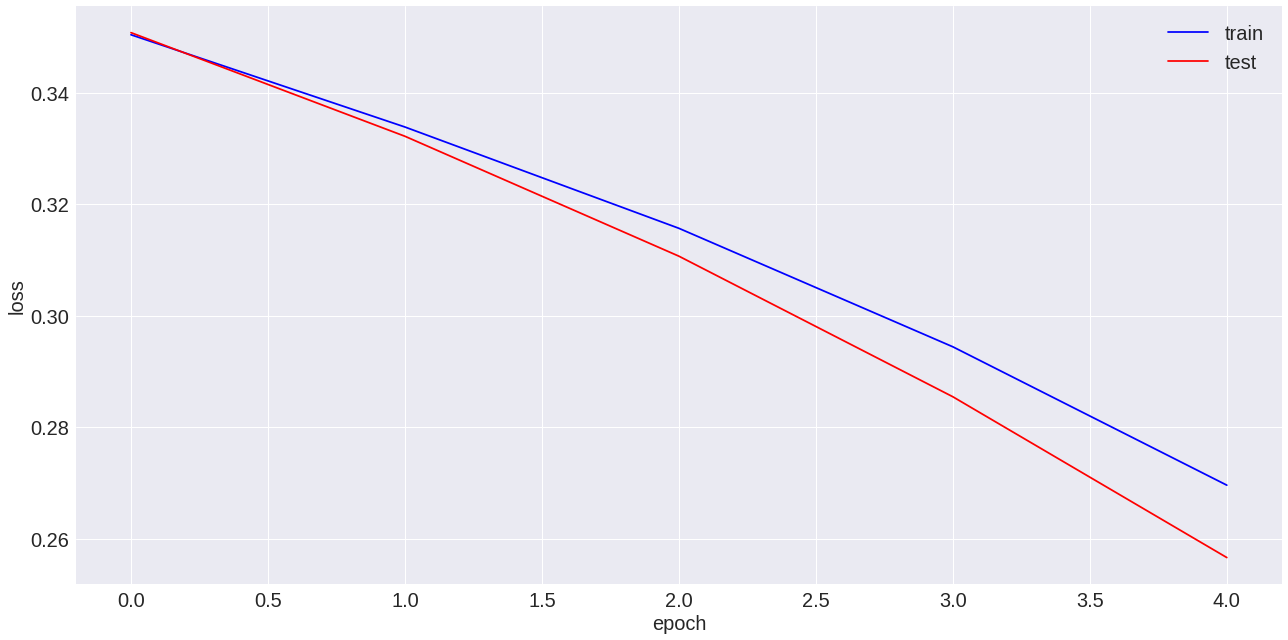

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#Geração do modelo para a média (rodada 10/10)

##montagem do modelo

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1) # quebrar aqui

# split into train and test sets
values = reframed.values
n_train_days = 2349
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features
train_X= train[:, :n_obs]
train_y = train[:,n_obs:]
test_X = test[:, :n_obs]
test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

versão antiga

In [ ]:
# design network

# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer=opt)

In [ ]:
# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

versão completa <ins>(não rodar)</ins>

In [ ]:
# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)    #sim
# model = Sequential()                #sim
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis #sim
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 70)             39480     
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 10)             710       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 26)             3848      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 10)             270       
Total params: 44,308
Trainable params: 44,308
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 5s - loss: 0.3428 - val_loss: 0.3413
Epoch 2/5
5/5 - 0s - loss: 0.3218 - val_loss: 0.3183
Epoch 3/5
5/5 - 0s - loss: 0.2977 - val_loss: 0.2916
Epoch 4/5
5/5 - 0s - loss: 0.2695 - val_loss: 0.2605
Epoch 5/5
5/5 - 0s - loss: 0.2369 - val_loss: 0.2253

Model Runtime: 5.30 seconds


##obtenção das métricas do treinamento

In [ ]:
#Ajuste dos dados para obtenção das métricas
yhat = model.predict(test_X)
yhat_teste = yhat.reshape((yhat.shape[0], n_features))
yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))
inv_yhat = scaler.inverse_transform(yhat)
inv_test_y = scaler.inverse_transform(test_y)
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

In [ ]:
df_inv_yhat.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,23.067711,30.871107,0.081757,0.006912,1007.707031,1.140968,4.415185,14.230721,29.217171,62.39489


In [ ]:
df_test_y.head(1)

,Temp_sc,NOx_sc,CO_sc,Chuva_sc,Pres_sc,Vel_Vento_sc,SO2_sc,PM10_sc,O3_sc,UR_sc
0,30.039513,45.78,0.13,0.0,1014.38,2.47,6.29,39.255877,96.43,82.238123


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 9.547
Test NOx_sc RMSE: 52.960
Test CO_sc RMSE: 0.542
Test Chuva_sc RMSE: 0.954
Test Pres_sc RMSE: 10.362
Test Vel_Vento_sc RMSE: 0.910
Test SO2_sc RMSE: 17.688
Test PM10_sc RMSE: 49.910
Test O3_sc RMSE: 43.910
Test UR_sc RMSE: 31.219


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 8.391
Test NOx_sc MAE: 43.207
Test CO_sc MAE: 0.432
Test Chuva_sc MAE: 0.475
Test Pres_sc MAE: 9.302
Test Vel_Vento_sc MAE: 0.800
Test SO2_sc MAE: 14.882
Test PM10_sc MAE: 44.962
Test O3_sc MAE: 38.084
Test UR_sc MAE: 30.376


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -435.076
Test NOx_sc R2: -488.875
Test CO_sc R2: -6784.403
Test Pres_sc R2: -1174.330
Test Pres_sc R2: -1174.330
Test Vel_Vento_sc R2: -294.559
Test SO2_sc R2: -2204.987
Test PM10_sc R2: -6991.554
Test O3_sc R2: -327.581
Test UR_sc R2: -8082.262


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36]),
 <a list of 9 Text major ticklabel objects>)

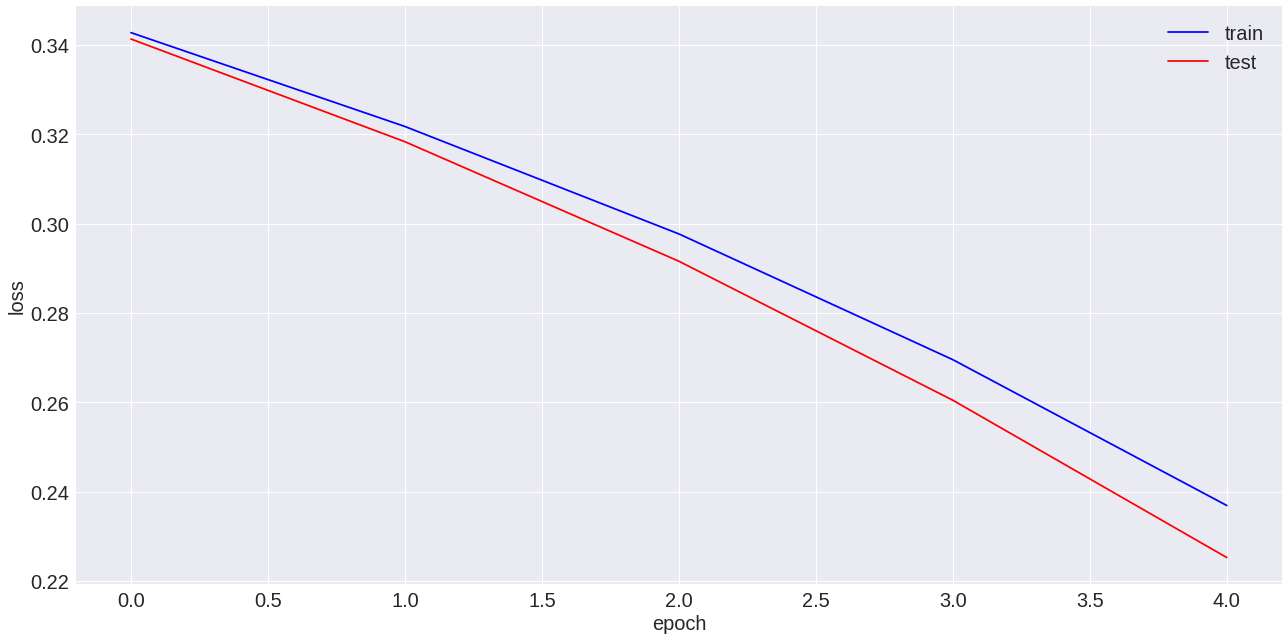

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 1- block cross validation

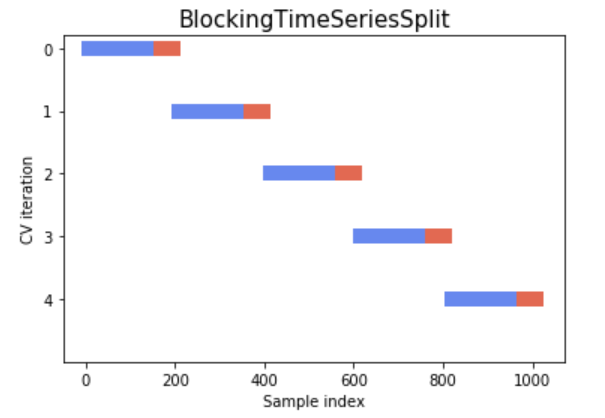

In [ ]:
Image("gdrive/My Drive/dissertação/block.png") #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#gdrive/My Drive/dissertação/block.png

#### pré-processamento dos dados (k=5)

In [38]:
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")
df_sc_new=pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")

import time
import pandas as pd
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed

# df_sc_new=pd.read_csv('df_sc_new.csv') !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# df_sp_new=pd.read_csv('df_sp_new.csv') !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# df_sp_new.reset_index(inplace=True)

df_sp_new['data_resolved']=df_sp_new['Data'].apply(lambda x: str(x)[:10])
df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sp_new.reset_index(inplace=True)

df_sp_new = df_sp_new[['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp', 'data_resolved']]

df_sp_new = df_sp_new.groupby(['data_resolved'], sort=False)['Temp_sp', 'NOx_sp', 'CO_sp', 'Chuva_sp', 'Pres_sp',
       'Vel_Vento_sp', 'SO2_sp', 'PM10_sp', 'O3_sp', 'UR_sp'].max()

names = df_sp_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sp = scaler.fit_transform(df_sp_new)

df_sp_new_scaled = pd.DataFrame(data_scaled_sp, columns=names)

df_sp_new_scaled.index=df_sp_new.index

df_sc_new.reset_index(inplace=True)

# df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)
df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)
df_sc_new_scaled.index=df_sc_new.index

values = df_sc_new_scaled.values
values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

#reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

####treinamento do modelo para o primeiro 1/5 da divisão

In [39]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[:634] ########## aqui que muda o slice

# split into train and test sets
values = reframed.values
n_train_days = 127 #1/5

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# # design network (falta ajustar o numero de camadas, neurônios etc)
# opt = Adam(learning_rate=0.0005)
# model = Sequential()
# model.add(LSTM(input_shape=(1,70),return_sequences=True, units=70)) #return=True é para retornar todas as variáveis
# model.add(TimeDistributed(Dense(10))) # é numero de variáveis
# # model.add(Dropout(0.2))
# model.add(LSTM(250,return_sequences=True))
# model.add(TimeDistributed(Dense(10)))
# # model.add(Dropout(0.2))
# model.add(Dense(10)) #talvez não precise
# # model.add(Activation("linear"))
# model.compile(loss='mse', optimizer=opt)

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 7s - loss: 0.1746 - val_loss: 0.1505
Epoch 2/5
1/1 - 0s - loss: 0.1726 - val_loss: 0.1488
Epoch 3/5
1/1 - 0s - loss: 0.1705 - val_loss: 0.1470
Epoch 4/5
1/1 - 0s - loss: 0.1684 - val_loss: 0.1451
Epoch 5/5
1/1 - 0s - loss: 0.1661 - val_loss: 0.1431

Model Runtime: 7.63 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 6.500
Test NOx_sc RMSE: 214.804
Test CO_sc RMSE: 2.429
Test Chuva_sc RMSE: 14.984
Test Pres_sc RMSE: 9.939
Test Vel_Vento_sc RMSE: 0.971
Test SO2_sc RMSE: 85.086
Test PM10_sc RMSE: 150.478
Test O3_sc RMSE: 85.318
Test UR_sc RMSE: 16.689


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 5.202
Test NOx_sc MAE: 203.844
Test CO_sc MAE: 2.198
Test Chuva_sc MAE: 12.598
Test Pres_sc MAE: 8.701
Test Vel_Vento_sc MAE: 0.783
Test SO2_sc MAE: 78.218
Test PM10_sc MAE: 143.529
Test O3_sc MAE: 79.152
Test UR_sc MAE: 14.656


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -4.485
Test NOx_sc R2: -39.149
Test CO_sc R2: -24.518
Test Pres_sc R2: -6.478
Test Pres_sc R2: -6.478
Test Vel_Vento_sc R2: -2.596
Test SO2_sc R2: -8.125
Test PM10_sc R2: -29.336
Test O3_sc R2: -7.701
Test UR_sc R2: -6.450


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24]),
 <a list of 7 Text major ticklabel objects>)

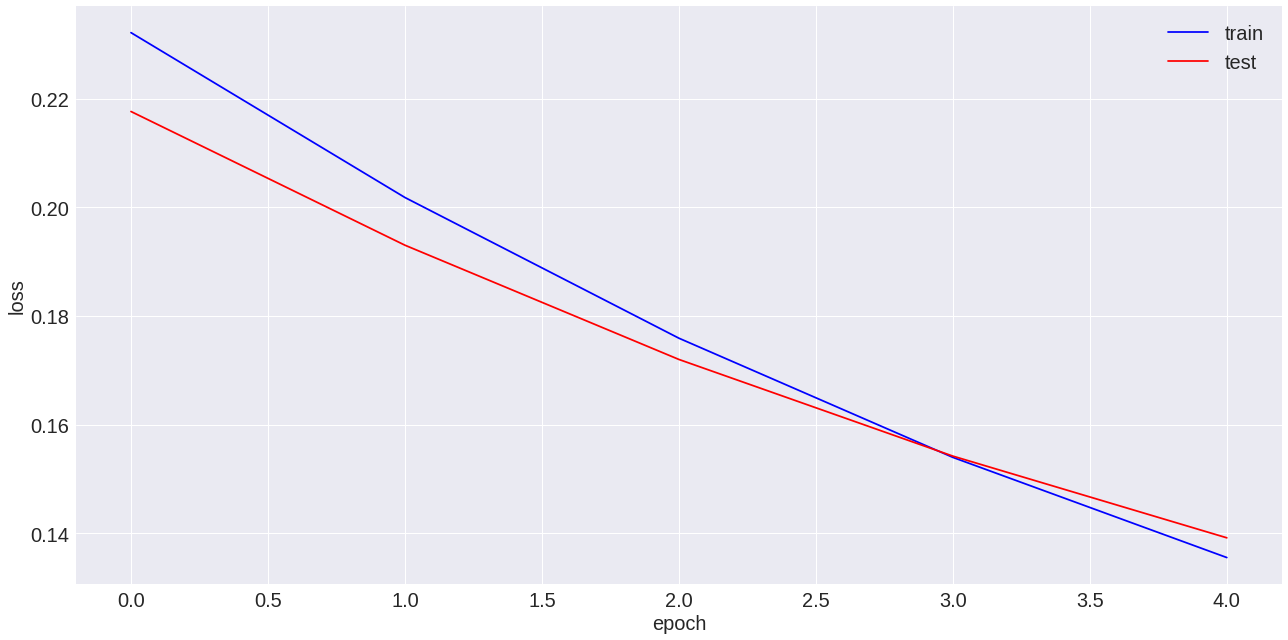

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

####treinamento do modelo para o primeiro 2/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[634:1268] ########## aqui que muda o slice

# split into train and test sets
values = reframed.values
n_train_days = 127 #1/5

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 5s - loss: 0.1381 - val_loss: 0.1275
Epoch 2/5
1/1 - 0s - loss: 0.1366 - val_loss: 0.1261
Epoch 3/5
1/1 - 0s - loss: 0.1351 - val_loss: 0.1247
Epoch 4/5
1/1 - 0s - loss: 0.1336 - val_loss: 0.1232
Epoch 5/5
1/1 - 0s - loss: 0.1320 - val_loss: 0.1217

Model Runtime: 4.92 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 14.794
Test NOx_sc RMSE: 89.631
Test CO_sc RMSE: 0.811
Test Chuva_sc RMSE: 4.927
Test Pres_sc RMSE: 12.108
Test Vel_Vento_sc RMSE: 1.688
Test SO2_sc RMSE: 23.485
Test PM10_sc RMSE: 57.930
Test O3_sc RMSE: 74.092
Test UR_sc RMSE: 26.982


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 14.097
Test NOx_sc MAE: 80.027
Test CO_sc MAE: 0.572
Test Chuva_sc MAE: 1.863
Test Pres_sc MAE: 11.414
Test Vel_Vento_sc MAE: 1.548
Test SO2_sc MAE: 18.468
Test PM10_sc MAE: 50.860
Test O3_sc MAE: 64.893
Test UR_sc MAE: 25.941


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -807398.814
Test NOx_sc R2: -54776.483
Test CO_sc R2: -5854.233
Test Pres_sc R2: -131456.843
Test Pres_sc R2: -131456.843
Test Vel_Vento_sc R2: -152561.910
Test SO2_sc R2: -11705.099
Test PM10_sc R2: -4079.674
Test O3_sc R2: -163994.381
Test UR_sc R2: -635727.552


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.12  , 0.1225, 0.125 , 0.1275, 0.13  , 0.1325, 0.135 , 0.1375,
        0.14  ]), <a list of 9 Text major ticklabel objects>)

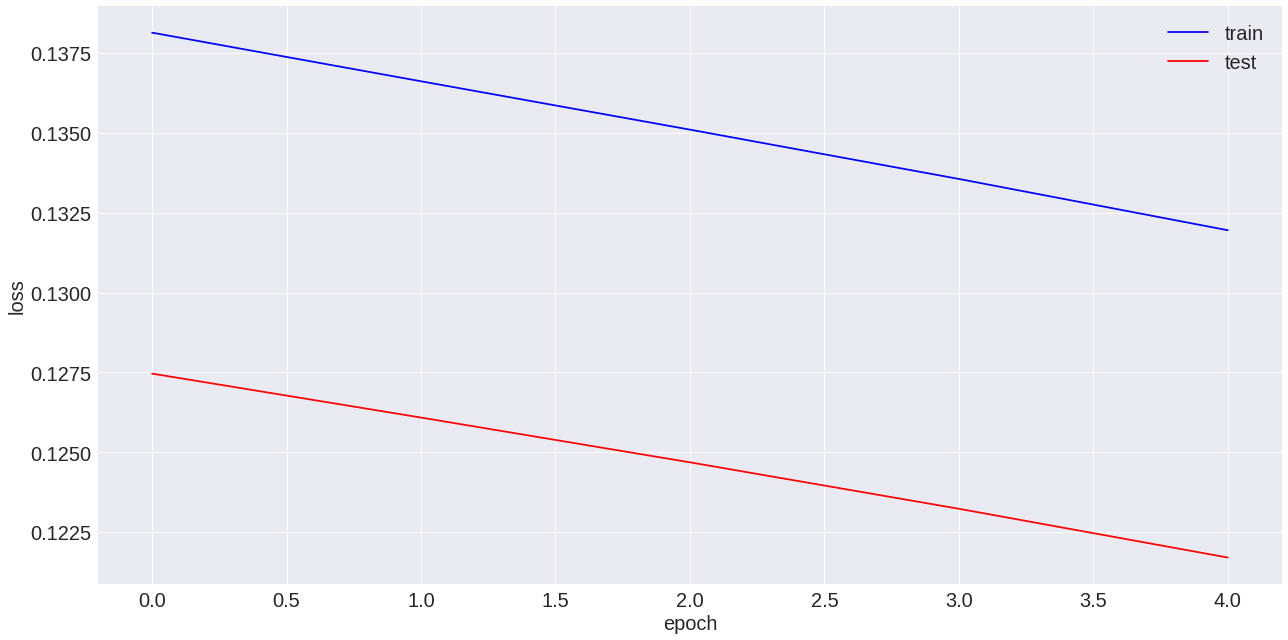

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

####treinamento do modelo para o primeiro 3/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[1268:1902] ########## aqui que muda o slice

# split into train and test sets
values = reframed.values
n_train_days = 127 #1/5

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 5s - loss: 0.1358 - val_loss: 0.1430
Epoch 2/5
1/1 - 0s - loss: 0.1341 - val_loss: 0.1415
Epoch 3/5
1/1 - 0s - loss: 0.1325 - val_loss: 0.1400
Epoch 4/5
1/1 - 0s - loss: 0.1309 - val_loss: 0.1385
Epoch 5/5
1/1 - 0s - loss: 0.1293 - val_loss: 0.1369

Model Runtime: 6.04 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 12.624
Test NOx_sc RMSE: 112.433
Test CO_sc RMSE: 0.621
Test Chuva_sc RMSE: 3.144
Test Pres_sc RMSE: 12.805
Test Vel_Vento_sc RMSE: 1.709
Test SO2_sc RMSE: 25.709
Test PM10_sc RMSE: 48.701
Test O3_sc RMSE: 63.813
Test UR_sc RMSE: 32.858


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 11.738
Test NOx_sc MAE: 103.214
Test CO_sc MAE: 0.418
Test Chuva_sc MAE: 1.521
Test Pres_sc MAE: 11.805
Test Vel_Vento_sc MAE: 1.594
Test SO2_sc MAE: 17.651
Test PM10_sc MAE: 40.141
Test O3_sc MAE: 57.096
Test UR_sc MAE: 31.671


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -43939.723
Test NOx_sc R2: -67624.014
Test CO_sc R2: -17915.921
Test Pres_sc R2: -65745.515
Test Pres_sc R2: -65745.515
Test Vel_Vento_sc R2: -86520.837
Test SO2_sc R2: -5164.008
Test PM10_sc R2: -10186.574
Test O3_sc R2: -38228.838
Test UR_sc R2: -581074.318


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.128, 0.13 , 0.132, 0.134, 0.136, 0.138, 0.14 , 0.142, 0.144]),
 <a list of 9 Text major ticklabel objects>)

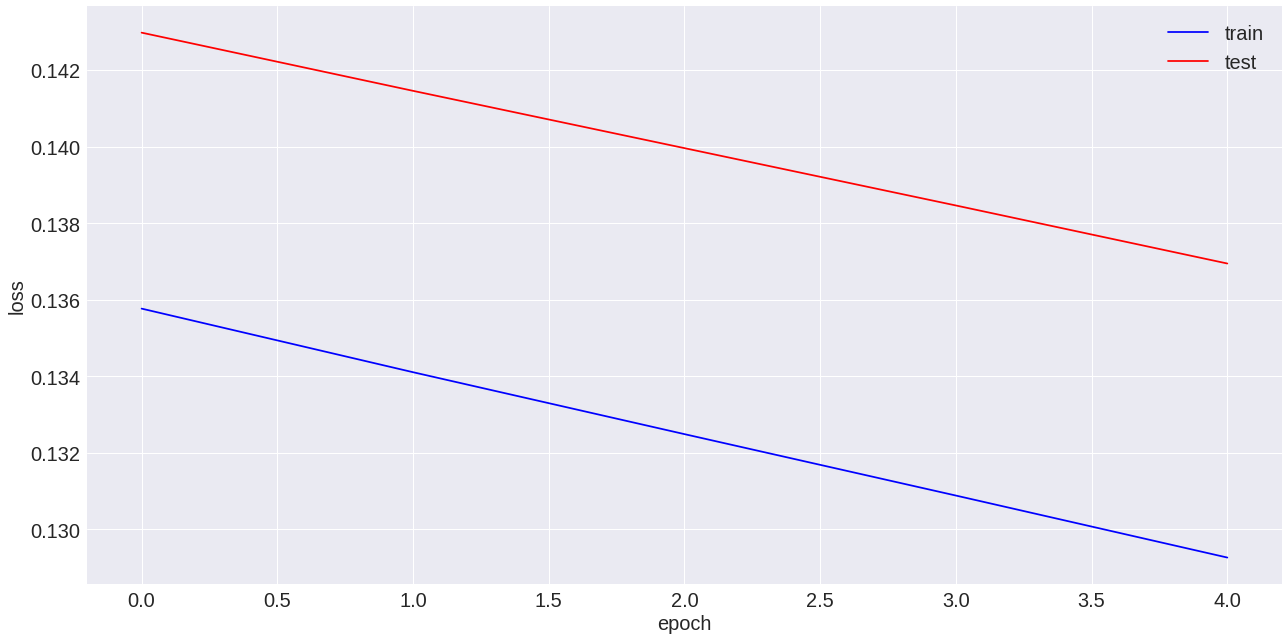

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

####treinamento do modelo para o primeiro 4/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[1902:2536] ########## aqui que muda o slice

# split into train and test sets
values = reframed.values
n_train_days = 127 #1/5

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 5s - loss: 0.1277 - val_loss: 0.1318
Epoch 2/5
1/1 - 0s - loss: 0.1265 - val_loss: 0.1305
Epoch 3/5
1/1 - 0s - loss: 0.1253 - val_loss: 0.1291
Epoch 4/5
1/1 - 0s - loss: 0.1241 - val_loss: 0.1278
Epoch 5/5
1/1 - 0s - loss: 0.1228 - val_loss: 0.1263

Model Runtime: 5.73 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 13.930
Test NOx_sc RMSE: 91.280
Test CO_sc RMSE: 0.780
Test Chuva_sc RMSE: 4.081
Test Pres_sc RMSE: 13.739
Test Vel_Vento_sc RMSE: 1.502
Test SO2_sc RMSE: 33.267
Test PM10_sc RMSE: 49.438
Test O3_sc RMSE: 81.364
Test UR_sc RMSE: 28.460


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 13.094
Test NOx_sc MAE: 80.971
Test CO_sc MAE: 0.568
Test Chuva_sc MAE: 2.412
Test Pres_sc MAE: 12.993
Test Vel_Vento_sc MAE: 1.390
Test SO2_sc MAE: 21.741
Test PM10_sc MAE: 40.026
Test O3_sc MAE: 70.478
Test UR_sc MAE: 27.200


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -51148.717
Test NOx_sc R2: -13765.111
Test CO_sc R2: -15347.389
Test Pres_sc R2: -59076.968
Test Pres_sc R2: -59076.968
Test Vel_Vento_sc R2: -35937.315
Test SO2_sc R2: -14119.262
Test PM10_sc R2: -8366.336
Test O3_sc R2: -14506.191
Test UR_sc R2: -316723.908


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.122, 0.124, 0.126, 0.128, 0.13 , 0.132, 0.134]),
 <a list of 7 Text major ticklabel objects>)

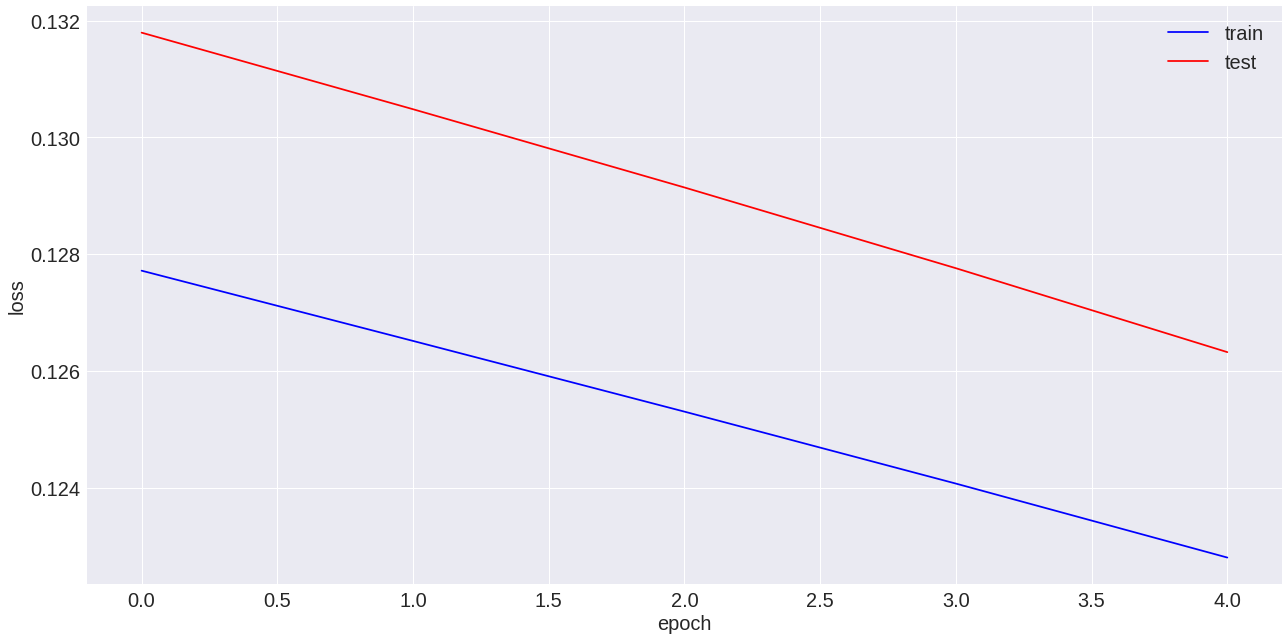

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

####treinamento do modelo para o primeiro 5/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)
reframed = reframed[2536:3170] ########## aqui que muda o slice

# split into train and test sets
values = reframed.values
n_train_days = 127 #1/5

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
1/1 - 5s - loss: 0.1418 - val_loss: 0.1642
Epoch 2/5
1/1 - 0s - loss: 0.1399 - val_loss: 0.1619
Epoch 3/5
1/1 - 0s - loss: 0.1380 - val_loss: 0.1596
Epoch 4/5
1/1 - 0s - loss: 0.1360 - val_loss: 0.1571
Epoch 5/5
1/1 - 0s - loss: 0.1340 - val_loss: 0.1545

Model Runtime: 6.22 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 14.340
Test NOx_sc RMSE: 75.331
Test CO_sc RMSE: 0.984
Test Chuva_sc RMSE: 4.275
Test Pres_sc RMSE: 12.224
Test Vel_Vento_sc RMSE: 1.696
Test SO2_sc RMSE: 34.884
Test PM10_sc RMSE: 61.467
Test O3_sc RMSE: 68.834
Test UR_sc RMSE: 36.109


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 13.254
Test NOx_sc MAE: 65.834
Test CO_sc MAE: 0.740
Test Chuva_sc MAE: 1.732
Test Pres_sc MAE: 11.340
Test Vel_Vento_sc MAE: 1.561
Test SO2_sc MAE: 28.000
Test PM10_sc MAE: 51.283
Test O3_sc MAE: 58.973
Test UR_sc MAE: 35.591


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -98352.792
Test NOx_sc R2: -18357.599
Test CO_sc R2: -32611.207
Test Pres_sc R2: -13937.764
Test Pres_sc R2: -13937.764
Test Vel_Vento_sc R2: -141875.611
Test SO2_sc R2: -3999.868
Test PM10_sc R2: -8171.176
Test O3_sc R2: -23364.077
Test UR_sc R2: -147255.368


**plot do histórico do treinamento**

<Figure size 1296x648 with 0 Axes>

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'loss')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text major ticklabel objects>)

(array([0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 ]),
 <a list of 9 Text major ticklabel objects>)

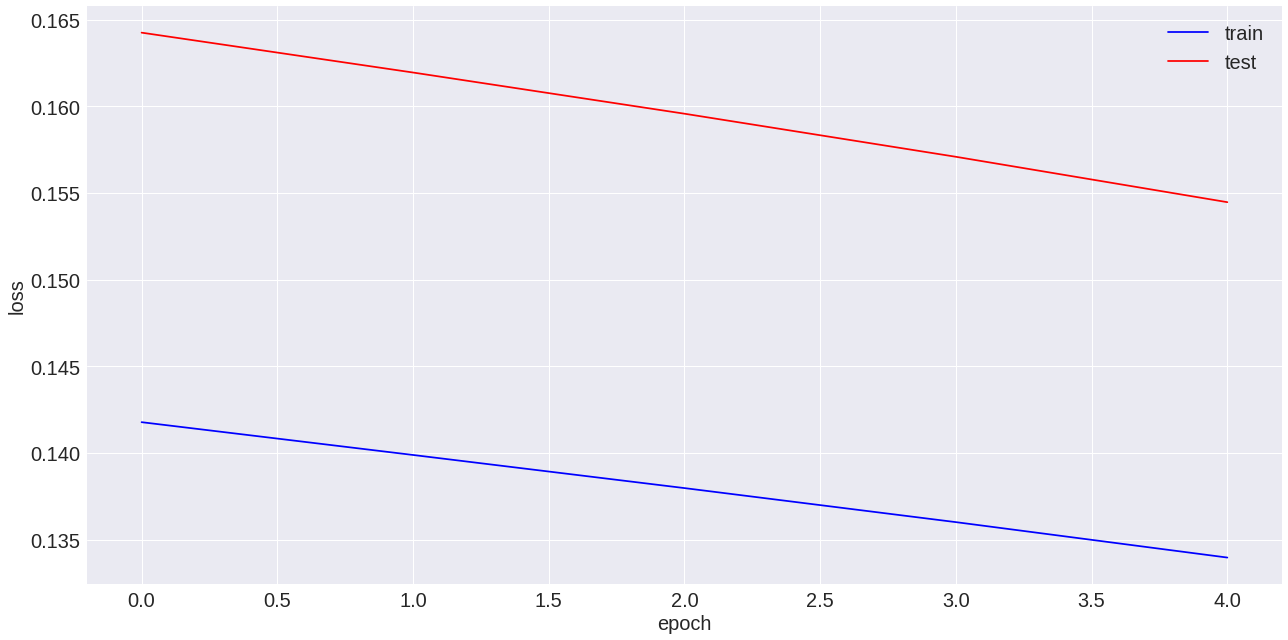

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# validação cruzada- método 2- split cross validation

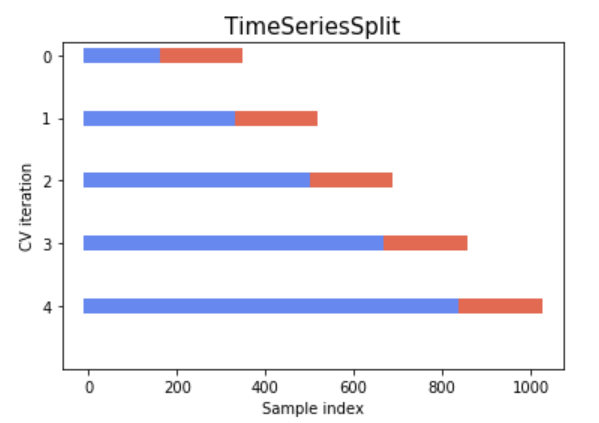

In [ ]:
Image("gdrive/My Drive/dissertação/split.png") #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

####pré-processamento dos dados

In [ ]:
df_sp_new=pd.read_csv("gdrive/My Drive/dissertação/df_sp_new.csv",sep=",")
df_sc_new=pd.read_csv("gdrive/My Drive/dissertação/df_sc_new.csv",sep=",")

import pandas as pd
import warnings
import time
import seaborn as sns
import missingno as msno
import warnings
from matplotlib import pyplot as plt
import datetime
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pd.set_option('display.max_columns',100)

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score #colocar citação

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
warnings.filterwarnings("ignore")

# df_sc_new=pd.read_csv('df_sc_new.csv')
# df_sp_new=pd.read_csv('df_sp_new.csv')

df_sc_new['data_resolved']=df_sc_new['Data'].apply(lambda x: str(x)[:10])

df_sc_new.reset_index(inplace=True)

df_sc_new = df_sc_new[['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc', 'data_resolved']]

df_sc_new = df_sc_new.groupby(['data_resolved'], sort=False)['Temp_sc', 'NOx_sc', 'CO_sc', 'Chuva_sc', 'Pres_sc',
       'Vel_Vento_sc', 'SO2_sc', 'PM10_sc', 'O3_sc', 'UR_sc'].max()

names = df_sc_new.columns

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled_sc = scaler.fit_transform(df_sc_new)

df_sc_new_scaled = pd.DataFrame(data_scaled_sc, columns=names)

df_sc_new_scaled.index=df_sc_new.index
values = df_sc_new_scaled.values

values = values.astype('float32')

# convert series to supervised learning
def series_to_supervised(data, n_in=10, n_out=10, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# specify the number of lag hours
n_days = 7 #input
n_features = 10 #10 colunas

#### treinamento do modelo para primeiro 1/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:1056]

# split into train and test sets
values = reframed.values
n_train_days = 528

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
2/2 - 5s - loss: 0.1621 - val_loss: 0.1297
Epoch 2/5
2/2 - 0s - loss: 0.1590 - val_loss: 0.1271
Epoch 3/5
2/2 - 0s - loss: 0.1558 - val_loss: 0.1243
Epoch 4/5
2/2 - 0s - loss: 0.1522 - val_loss: 0.1212
Epoch 5/5
2/2 - 0s - loss: 0.1482 - val_loss: 0.1178

Model Runtime: 6.07 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 11.845
Test NOx_sc RMSE: 114.850
Test CO_sc RMSE: 1.209
Test Chuva_sc RMSE: 3.378
Test Pres_sc RMSE: 14.785
Test Vel_Vento_sc RMSE: 1.469
Test SO2_sc RMSE: 28.599
Test PM10_sc RMSE: 74.296
Test O3_sc RMSE: 61.734
Test UR_sc RMSE: 24.830


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 10.907
Test NOx_sc MAE: 99.527
Test CO_sc MAE: 1.004
Test Chuva_sc MAE: 1.911
Test Pres_sc MAE: 14.086
Test Vel_Vento_sc MAE: 1.281
Test SO2_sc MAE: 24.089
Test PM10_sc MAE: 67.064
Test O3_sc MAE: 54.213
Test UR_sc MAE: 23.748


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -14664.880
Test NOx_sc R2: -28339.398
Test CO_sc R2: -8590.317
Test Pres_sc R2: -121011.417
Test Pres_sc R2: -121011.417
Test Vel_Vento_sc R2: -14531.529
Test SO2_sc R2: -7975.403
Test PM10_sc R2: -40713.504
Test O3_sc R2: -22831.257
Test UR_sc R2: -24158.437


**histórico do treinamento**

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

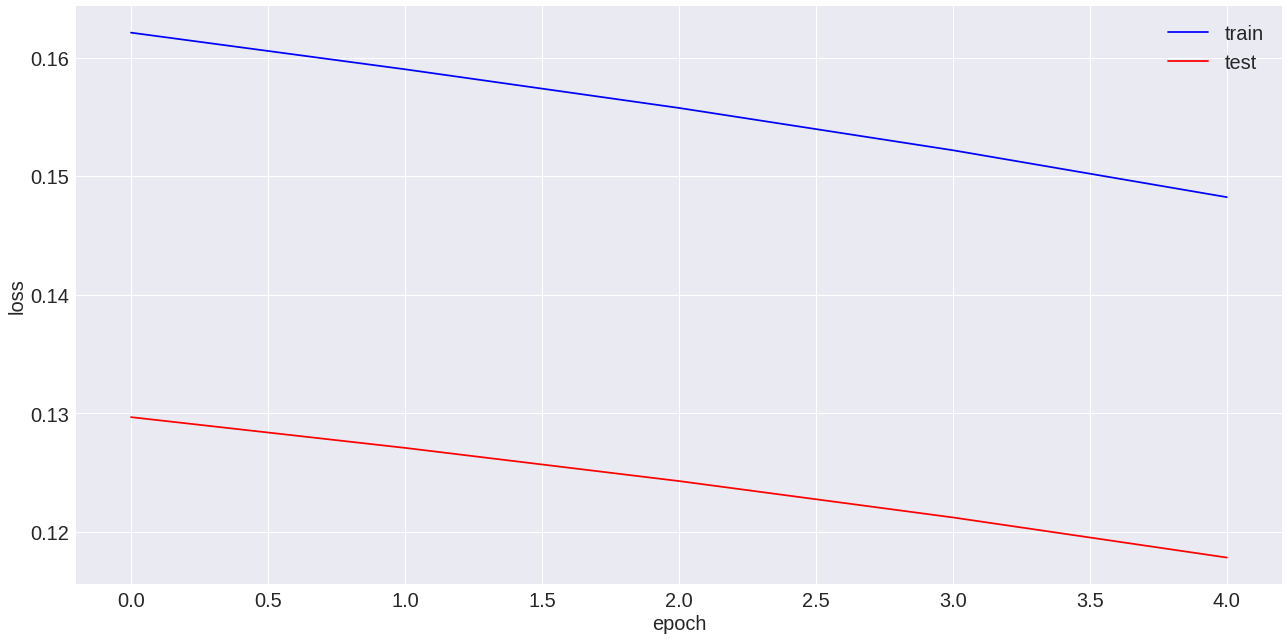

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#### treinamento do modelo para primeiro 2/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:1584]

# split into train and test sets
values = reframed.values
n_train_days = 1056

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
3/3 - 6s - loss: 0.1468 - val_loss: 0.1293
Epoch 2/5
3/3 - 0s - loss: 0.1434 - val_loss: 0.1260
Epoch 3/5
3/3 - 0s - loss: 0.1397 - val_loss: 0.1223
Epoch 4/5
3/3 - 0s - loss: 0.1355 - val_loss: 0.1180
Epoch 5/5
3/3 - 0s - loss: 0.1306 - val_loss: 0.1130

Model Runtime: 6.43 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 12.375
Test NOx_sc RMSE: 98.246
Test CO_sc RMSE: 0.630
Test Chuva_sc RMSE: 4.863
Test Pres_sc RMSE: 10.187
Test Vel_Vento_sc RMSE: 1.700
Test SO2_sc RMSE: 21.117
Test PM10_sc RMSE: 58.390
Test O3_sc RMSE: 80.609
Test UR_sc RMSE: 27.739


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 11.350
Test NOx_sc MAE: 83.569
Test CO_sc MAE: 0.393
Test Chuva_sc MAE: 1.721
Test Pres_sc MAE: 9.208
Test Vel_Vento_sc MAE: 1.584
Test SO2_sc MAE: 14.942
Test PM10_sc MAE: 51.705
Test O3_sc MAE: 72.624
Test UR_sc MAE: 26.528


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -10411.661
Test NOx_sc R2: -14092.657
Test CO_sc R2: -1820.676
Test Pres_sc R2: -6891.800
Test Pres_sc R2: -6891.800
Test Vel_Vento_sc R2: -118378.735
Test SO2_sc R2: -4346.682
Test PM10_sc R2: -48756.713
Test O3_sc R2: -31933.045
Test UR_sc R2: -669059.622


**histórico do treinamento**

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

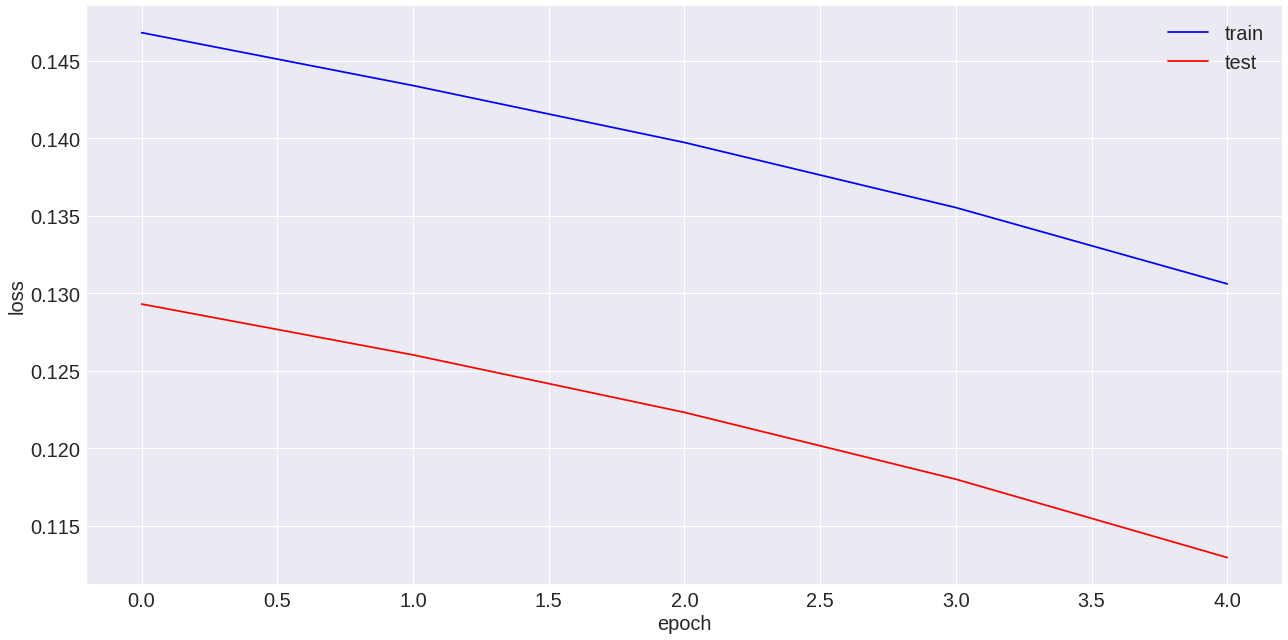

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#### treinamento do modelo para primeiro 3/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:2112]

# split into train and test sets
values = reframed.values
n_train_days = 1584

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
4/4 - 5s - loss: 0.1410 - val_loss: 0.1351
Epoch 2/5
4/4 - 0s - loss: 0.1314 - val_loss: 0.1244
Epoch 3/5
4/4 - 0s - loss: 0.1203 - val_loss: 0.1113
Epoch 4/5
4/4 - 0s - loss: 0.1065 - val_loss: 0.0953
Epoch 5/5
4/4 - 0s - loss: 0.0899 - val_loss: 0.0767

Model Runtime: 5.57 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 6.532
Test NOx_sc RMSE: 97.413
Test CO_sc RMSE: 0.763
Test Chuva_sc RMSE: 2.941
Test Pres_sc RMSE: 10.672
Test Vel_Vento_sc RMSE: 1.246
Test SO2_sc RMSE: 28.571
Test PM10_sc RMSE: 52.450
Test O3_sc RMSE: 52.232
Test UR_sc RMSE: 23.558


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 5.504
Test NOx_sc MAE: 85.091
Test CO_sc MAE: 0.510
Test Chuva_sc MAE: 2.053
Test Pres_sc MAE: 9.553
Test Vel_Vento_sc MAE: 1.095
Test SO2_sc MAE: 25.333
Test PM10_sc MAE: 43.386
Test O3_sc MAE: 44.232
Test UR_sc MAE: 22.331


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -340.165
Test NOx_sc R2: -7505.809
Test CO_sc R2: -35931.026
Test Pres_sc R2: -2199.661
Test Pres_sc R2: -2199.661
Test Vel_Vento_sc R2: -5046.176
Test SO2_sc R2: -154.584
Test PM10_sc R2: -9077.906
Test O3_sc R2: -4911.581
Test UR_sc R2: -1932.470


**histórico do treinamento**

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

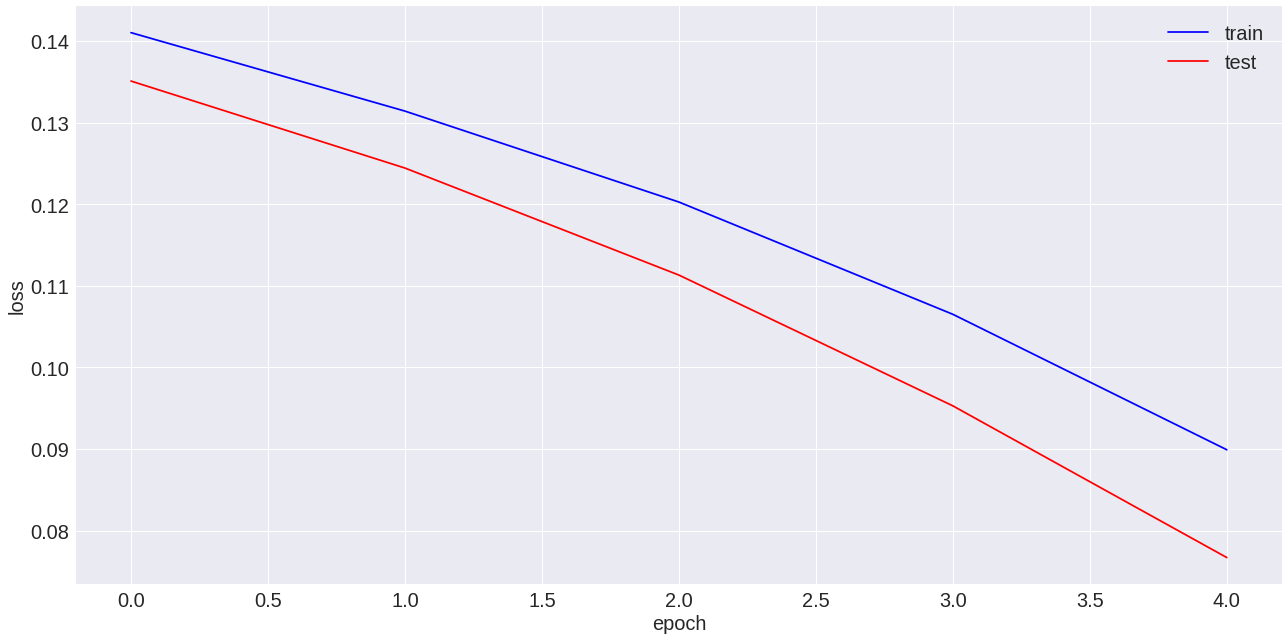

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#### treinamento do modelo para primeiro 4/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:2640]

# split into train and test sets
values = reframed.values
n_train_days = 2112

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
5/5 - 6s - loss: 0.1388 - val_loss: 0.1239
Epoch 2/5
5/5 - 0s - loss: 0.1289 - val_loss: 0.1131
Epoch 3/5
5/5 - 0s - loss: 0.1163 - val_loss: 0.0997
Epoch 4/5
5/5 - 0s - loss: 0.1008 - val_loss: 0.0844
Epoch 5/5
5/5 - 0s - loss: 0.0838 - val_loss: 0.0702

Model Runtime: 9.71 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 4.957
Test NOx_sc RMSE: 58.222
Test CO_sc RMSE: 0.613
Test Chuva_sc RMSE: 4.312
Test Pres_sc RMSE: 5.888
Test Vel_Vento_sc RMSE: 1.218
Test SO2_sc RMSE: 75.447
Test PM10_sc RMSE: 67.351
Test O3_sc RMSE: 87.534
Test UR_sc RMSE: 21.941


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 3.962
Test NOx_sc MAE: 46.292
Test CO_sc MAE: 0.571
Test Chuva_sc MAE: 2.066
Test Pres_sc MAE: 4.451
Test Vel_Vento_sc MAE: 1.065
Test SO2_sc MAE: 71.975
Test PM10_sc MAE: 62.077
Test O3_sc MAE: 76.735
Test UR_sc MAE: 20.303


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -47.225
Test NOx_sc R2: -1262.589
Test CO_sc R2: -99.729
Test Pres_sc R2: -112.888
Test Pres_sc R2: -112.888
Test Vel_Vento_sc R2: -1662.367
Test SO2_sc R2: -417.682
Test PM10_sc R2: -2055.284
Test O3_sc R2: -22845.456
Test UR_sc R2: -1653.298


**histórico do treinamento**

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

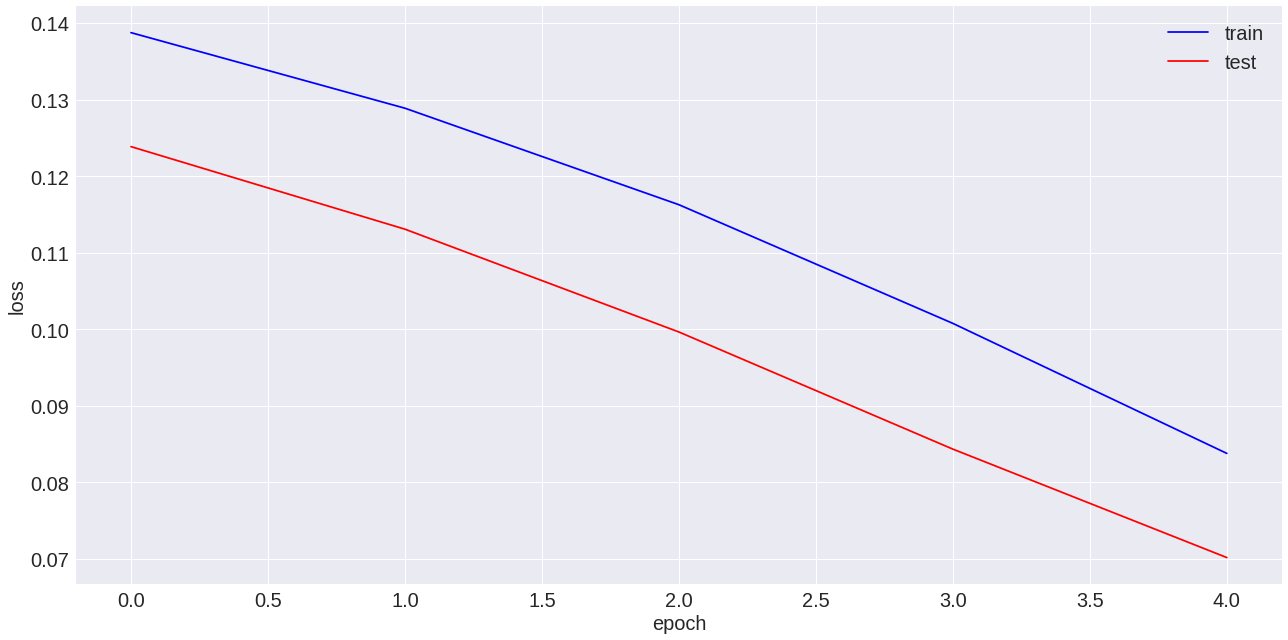

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

#### treinamento do modelo para primeiro 5/5 da divisão

In [ ]:
reframed = series_to_supervised(df_sc_new_scaled, n_days, 1)

#split 1: 528 + 528

reframed = reframed[:3168]

# split into train and test sets
values = reframed.values
n_train_days = 2640

train = values[:n_train_days, :]

test = values[n_train_days:, :]

# split into input and outputs
n_obs = n_days * n_features

train_X= train[:, :n_obs]

train_y = train[:,n_obs:]

test_X = test[:, :n_obs]

test_y = test[:, n_obs:]

train_X= train_X.reshape((train_X.shape[0], 1, n_obs))
train_y = train_y.reshape((train_y.shape[0], 1, n_features))
test_X= test_X.reshape((test_X.shape[0], 1, n_obs))
test_y = test_y.reshape((test_y.shape[0], 1, n_features))

# design network (falta ajustar o numero de camadas, neurônios etc)
opt = Adam(learning_rate=0.0005)
model = Sequential()
model.add(Bidirectional(LSTM(input_shape=(1,70),return_sequences=True, units=70))) #return=True é para retornar todas as variáveis
model.add(TimeDistributed(Dense(10))) # é numero de variáveis
model.add(Bidirectional(LSTM(26,return_sequences=True)))
model.add(TimeDistributed(Dense(10)))
model.compile(loss='mse', optimizer=opt)

a=time.time()
history = model.fit(train_X, train_y, epochs=5, batch_size=500, validation_data=(test_X, test_y), verbose=2, shuffle=False)
print("\nModel Runtime: %0.2f seconds"%((time.time() - a)))

Epoch 1/5
6/6 - 5s - loss: 0.1388 - val_loss: 0.1594
Epoch 2/5
6/6 - 0s - loss: 0.1316 - val_loss: 0.1492
Epoch 3/5
6/6 - 0s - loss: 0.1218 - val_loss: 0.1349
Epoch 4/5
6/6 - 0s - loss: 0.1085 - val_loss: 0.1161
Epoch 5/5
6/6 - 0s - loss: 0.0923 - val_loss: 0.0946

Model Runtime: 5.79 seconds


**resultados do treinamento**

In [ ]:
yhat = model.predict(test_X)

yhat_teste = yhat.reshape((yhat.shape[0], n_features))

yhat = yhat.reshape((yhat.shape[0], n_features))
test_y = test_y.reshape((test_y.shape[0], n_features))

inv_yhat = scaler.inverse_transform(yhat)

inv_test_y = scaler.inverse_transform(test_y)

#dataframe
df_inv_yhat=pd.DataFrame(inv_yhat,columns=names)
df_test_y=pd.DataFrame(inv_test_y,columns=names)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
rmse = sqrt(mean_squared_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc']))
print('Test Temp_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc']))
print('Test NOx_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc']))
print('Test CO_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc']))
print('Test Chuva_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc']))
print('Test Pres_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc']))
print('Test Vel_Vento_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc']))
print('Test SO2_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc']))
print('Test PM10_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc']))
print('Test O3_sc RMSE: %.3f' % rmse)

rmse = sqrt(mean_squared_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc']))
print('Test UR_sc RMSE: %.3f' % rmse)

Test Temp_sc RMSE: 13.771
Test NOx_sc RMSE: 40.024
Test CO_sc RMSE: 1.844
Test Chuva_sc RMSE: 6.526
Test Pres_sc RMSE: 7.694
Test Vel_Vento_sc RMSE: 1.298
Test SO2_sc RMSE: 39.662
Test PM10_sc RMSE: 41.628
Test O3_sc RMSE: 65.746
Test UR_sc RMSE: 22.483


In [ ]:
mae = mean_absolute_error(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Chuva_sc'], df_test_y['Chuva_sc'])
print('Test Chuva_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc MAE: %.3f' % mae)

mae = mean_absolute_error(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc MAE: %.3f' % mae)

Test Temp_sc MAE: 12.677
Test NOx_sc MAE: 35.943
Test CO_sc MAE: 1.722
Test Chuva_sc MAE: 5.649
Test Pres_sc MAE: 6.504
Test Vel_Vento_sc MAE: 1.121
Test SO2_sc MAE: 34.018
Test PM10_sc MAE: 36.726
Test O3_sc MAE: 55.454
Test UR_sc MAE: 21.616


In [ ]:
r2=r2_score(df_inv_yhat['Temp_sc'], df_test_y['Temp_sc'])
print('Test Temp_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['NOx_sc'], df_test_y['NOx_sc'])
print('Test NOx_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['CO_sc'], df_test_y['CO_sc'])
print('Test CO_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Pres_sc'], df_test_y['Pres_sc'])
print('Test Pres_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['Vel_Vento_sc'], df_test_y['Vel_Vento_sc'])
print('Test Vel_Vento_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['SO2_sc'], df_test_y['SO2_sc'])
print('Test SO2_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['PM10_sc'], df_test_y['PM10_sc'])
print('Test PM10_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['O3_sc'], df_test_y['O3_sc'])
print('Test O3_sc R2: %.3f' % r2)

r2=r2_score(df_inv_yhat['UR_sc'], df_test_y['UR_sc'])
print('Test UR_sc R2: %.3f' % r2)

Test Temp_sc R2: -22272.517
Test NOx_sc R2: -130.104
Test CO_sc R2: -546.567
Test Pres_sc R2: -360.801
Test Pres_sc R2: -360.801
Test Vel_Vento_sc R2: -1438.898
Test SO2_sc R2: -1978.492
Test PM10_sc R2: -44.682
Test O3_sc R2: -15221.193
Test UR_sc R2: -440.918


**histórico do treinamento**

In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

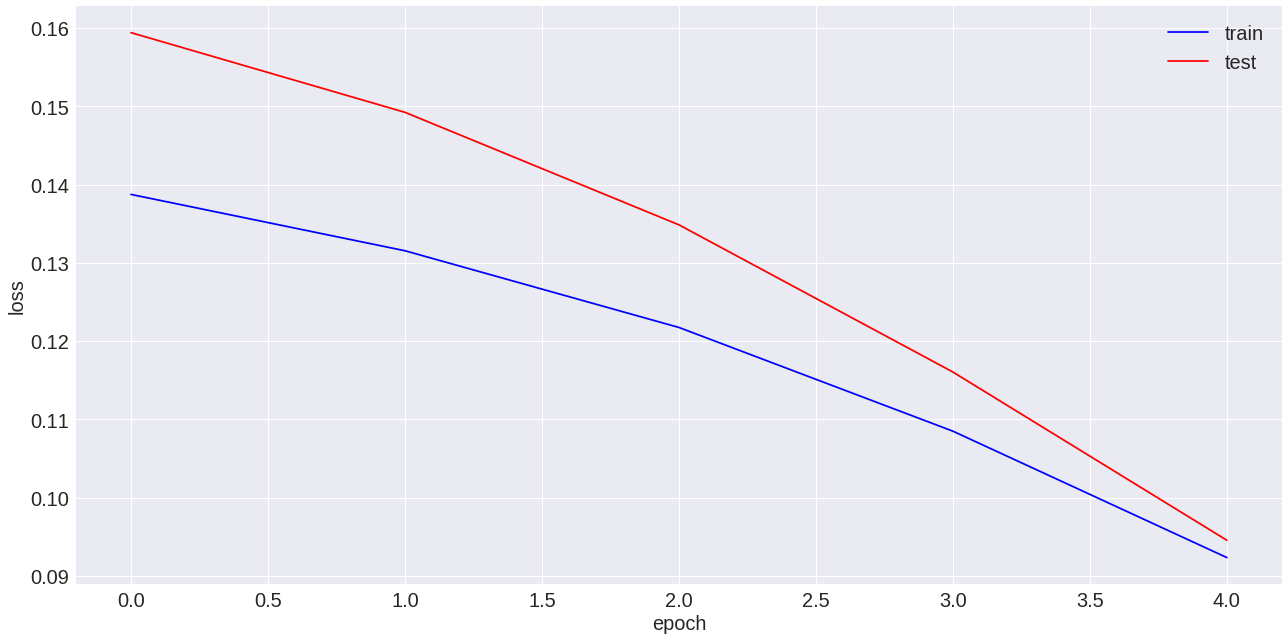

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18,9))
pyplot.plot(history.history['loss'], label='train', color='blue')
pyplot.plot(history.history['val_loss'], label='test', color='red')
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss',fontsize=20) 
# plt.title('train and test loss evolution',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
pyplot.legend(fontsize=20)
pyplot.show()

# links sobre hiperparâmetros de redes neurais recorrentes LSTM

In [ ]:
'''
O que foi feito nesta etapa:
----------------------------

Nesta etapa, com intuito de conseguir o melhor modelo, pesquisei sobre os hiperparâmetros que compõem as redes LSTM.
Abaixo seguem os links que salvei da pesquisa

'''

**-ativação (x)**
https://keras.io/api/layers/activations/
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
https://medium.com/@snaily16/what-why-and-which-activation-functions-b2bf748c0441
http://kth.diva-portal.org/smash/get/diva2:1465073/FULLTEXT01.pdf

**-diferença entre ativação e recurrent_activation (x)**:
https://stackoverflow.com/questions/44947842/can-someone-explain-to-me-the-difference-between-activation-and-recurrent-activa

**-significado dos layers:(x)**
https://stackoverflow.com/questions/57414387/meaning-of-tf-keras-layers-lstm-parameters
https://machinelearningmastery.com/use-dropout-lstm-networks-time-series-forecasting/

**-kernel initializer:(x)**
https://keras.io/api/layers/initializers/
https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78
https://wandb.ai/sayakpaul/weight-initialization-tb/reports/Effects-of-Weight-Initialization-on-Neural-Networks--Vmlldzo2ODY0NA

**-recurrent initializer:(x)**
https://stackoverflow.com/questions/63630659/what-does-recurrent-initializer-do
https://notebook.community/infilect/ml-course1/deep-learning-keras/keras-notebooks/RNN/7.1%20RNN%20and%20LSTM
https://stackoverflow.com/questions/64881855/kernel-and-recurrent-kernel-in-keras-lstms

**-bias initializer:(x)**
https://www.tutorialexample.com/understand-lstm-weight-and-bias-initialization-when-initializer-is-none-in-tensorflow-tensorflow-tutorial/
https://medium.com/@glenmeyerowitz/bias-initialization-in-a-neural-network-2e5d26fed0f0
https://cs231n.github.io/neural-networks-2/


**-kernel regularizer:(x)**
https://machinelearningmastery.com/use-weight-regularization-lstm-networks-time-series-forecasting/ https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

**-bias regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-learning-with-weight-regularization/

**-activity regularizer:(x)**
https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/

**-kernel constraint:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-in-deep-neural-networks-with-weight-constraints-in-keras/

**-dropout:(x)**
https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

**-recurrent dropout:(x)**
https://stackoverflow.com/questions/44924690/keras-the-difference-between-lstm-dropout-and-lstm-recurrent-dropout

**-return sequences/states:(x)**
https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/
https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/

**-go backwards:(x)**
https://stackoverflow.com/questions/49946942/keras-lstm-go-backwards-usage

**-stateful:(x)**
https://machinelearningmastery.com/stateful-stateless-lstm-time-series-forecasting-python/
https://stackoverflow.com/questions/39681046/keras-stateful-vs-stateless-lstms

**-time_major:(x)**
https://stackoverflow.com/questions/42130491/batch-major-vs-time-major-lstm

**-unroll:(x)**
https://machinelearningmastery.com/rnn-unrolling/
https://stats.stackexchange.com/questions/492040/what-is-unrolling-in-lstm

número de neurônios e camadas escondidas

In [ ]:
#https://www.temjournal.com/content/94/TEMJournalNovember2020_1320_1329.pdf *
#https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/ *
#https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer
#https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw *
#https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e
#https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/ *
#https://www.hindawi.com/journals/mpe/2013/425740/

In [ ]:
#primeira fórmula: raiz do numero de input * numero de output (testar outras)